# 웹크롤링(Web Crawling) 기초
* 웹 크롤링은 인터넷에서 특정 웹사이트나 웹페이지의 데이터를 자동으로 수집하는 기술
* 프로그램을 사용하여 웹페이지를 방문하고, HTML 문서, 텍스트, 이미지, 또는 기타 데이터를 추출하여 저장하는 방식으로 이루어짐
* 활용분야: 최신 뉴스 자동 수집, 전자상거래 웹사이트에서 상품 정보(가격, 리뷰, 상품 등) 수집, 데이터 분석을 포함


### 웹 크롤링의 주요 절차

1. 요청(Requests): 데이터를 수집하고 싶은 웹사이트에 **접근 허락 요청**을하고, **가공되지 않은 HTML 코드(데이터)를** 가져옴
* requests 라이브러리가 사용

2. 파싱(Parsing): 가공되지 않은 HTML 코드를 **원하는 조건으로 탐색하고 추출할 수 있는 HTML 코드로 변환**하고, 그 코드에서 원하는 태그와 관련 데이터를 추출
* BeautifulSoup 같은 라이브러리를 활용
* for문, findall() 함수,find()함수를 사용

3. 데이터 저장: 추출한 데이터를 Pandas의 **데이터프레임(엑셀과 유사)으로 저장**
* Pandas 라이브러리를 이용하고, 그 데이터프레임을 **CSV 파일 형식으로 변환**해서 내드라이브의 폴더(예, mypython)으로 저장하는 방식이 일반적

### 간단한 Python 웹 크롤링 예시


### 1. 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. 필요한 라이브러리 활용

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### 3. 웹페이지에 접근요청하고 가공하지 않은 HTML 데이터를 가져오기
* requests 라이브러리를 이용해서 데이터를 수집하고자하는 웹 페이지에 HTTP 요청을 보내 응답 데이터를 확인
* 가공하지 않은 원본 HTML 코드를 받아오기
* 아래 예시 코드의 requests.get(URL) 이용하여 HTTP 요청 상태 확인(예: 200: 성공, 404: 실패)
* 아래 예시 코드의 html.text 이용해서 가공되지 않은 HTML 코드를 추출하고 문자열로 출력함
* 그러나 이 코드 출력값으로는 HTML 코드를 직접 탐색하거나 분석하지 않음


In [ ]:
# 크롤링할 Yes24 베스트셀러 페이지의 URL을 지정
URL ='https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24'

# 지정된 URL에 HTTP GET 요청을 보내고, 응답 데이터(응답상태와 가공하지 않은 HTML 코드)를 html에 저장
html = requests.get(URL)
#이렇게 말하는 것이다 야 yes24서버야 저기 있는 베스트셀로 페이지 HTML 좀 줘!! 그럼 yes24 서버느 HTML 코드를 HTTP 응답으로 보내준다.(즉, 우리의 HTTP 요청에 HTTP 응답을 보내준다. )

# HTTP 응답 상태 코드 출력
print(html) # 출력값: <Response [200]>, 200는 HTTP 상태 코드: 200은 성공, 404: 요청한 페이지를 찾을 수 없음, 403: 접금금지, 500: 서버에러
# html은 requests의 응답 객체다. html.text는 응답 객체 내부에 있는 html 코드만 꺼내서 문자열로 변환한 것이다. 즉, 서버가 보낸 html의 원본 문자열!
# 가져온 HTML 코드 출력(가공하지 않은 코드)
print(html.text)
# 예) <!DOCTYPE html><html><head><title>Yes24 베스트셀러</title></head><body><div class="book">...</div></body></html>

<Response [200]>


 ### 4. 탐색하고 추출하기 쉬운 HTML 코드로 변환하고, 원하는 데이터 부분을 추출하기(파싱)
* BeautifulSoup 클래스를 이용해서 가져온 HTML 코드를 여러가지 조건에 맞게 원하는 부분만 추출하기(파싱)
* BeautifulSoup 클래스는 bs4(BeautifulSoup4) 라이브러리에 속해있음
* BeautifulSoup 클래스를 이용해서 가공하지 않은 HTML 코드를 탐색하고 추출하기 쉽게 변환
* 변환된 HTML 데이터를 조건에 맞게 여러 함수를 이용해 원하는 특정 태그와 데이터를 추출


In [ ]:
# BeautifulSoup 클래스 이용
from bs4 import BeautifulSoup

#  가져온 HTML 코드(html.text)를 분석가능한 HTML 코드로 변환(= BeautifulSoup 객체라고도 함)
soup = BeautifulSoup(html.text,'html.parser') # 'html.parser': HTML 코드를 분석하기 위한 파서(분석도구)
print(soup)  #원본 웹페이지 HTML을 분석가능한 객체인 soup로 바꿔서 추출 가능하게 만드는 코드이다.
# 객체이름 = 클래스이름(값1, 값2, ...)
# BeautifulSoup이 HTML을 분석할 때 어떤 방식으로 파싱할지 선택하는 옵션. 'html.parser' = 파이썬에 기본 내장된 HTML 분석 엔진


<!DOCTYPE html >

<html lang="ko">
<head><link href="https://m.yes24.com/Home/Best?DispNo=001" media="only screen and(max-width: 640px)" rel="alternate"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" http-equiv="Accept-CH"/>
<meta content="86400" http-equiv="Accept-CH-Lifetime"/>
<meta content="unsafe-url" name="referrer"/>
<meta content="width=1170" name="viewport"/>
<title> 국내도서 종합 베스트 - 예스24 </title>
<meta content="예스24" name="title"/>
<meta content="도서, 티켓, 음반, 굿즈, 커뮤니티까지 문화 전반을 아우르는 국내 대표 문화콘텐츠 플랫폼, 아낌없는 혜택과 총알배송을 경험해보세요." name="description"/>
<meta content="인터넷 서점, 온라인 쇼핑, 상품 추천, 쇼핑몰, 상품 검색, 도서 정보, 국내도서, 외국도서, 전자책, eBook, 이북, 크레마, 공연, 콘서트, 뮤지컬, 음반, 예매, DVD, 블루레이, 예스24, YES24, 교보문고, 알라딘, 리센스, 예스24 도서용품, 친환경 PB 브랜드, 사은품, 굿즈" name="keywords"/>
<link href="//www.yes24.com/Opensearc

### 5. Yes24 베스트셀러 페이지의 서적명 추출

1. BeautifulSoup 객체인 soup에서 **<a> 태그 중 클래스가 'gd_name'인 모든 요소** 를 찾고, 그 리스트를 **titles 변수에 저장하기**
*  문법형식: HTML코드객체.find_all('태그이름', class = '클래스이름')
2. 그 titles 리스트에서 개별 요소의 서적명을 순차적으로 출력
* for문


# ✔️ BeautifulSoup 크롤링 핵심 요약 (Colab용 정리)

## 🎯 핵심 원리
크롤링은 **HTML 구조만 잘 보면 되는 기술**입니다.

- 오직 **HTML 태그(tag), class, id** 만 확인하면 됨  
- 크롬 개발자도구(Elements 탭)에서 구조를 확인 → BeautifulSoup으로 선택

---

# ✔️ 기본 크롤링 절차

1️⃣ 원하는 데이터의 HTML 태그(tag) + 클래스/아이디(class/id) 확인

✔  크롬의 Elements 탭활용해서 원하는 데이터의 tag(태그)와 클래스(class) 확인:
* 예) <a class='gd_name': href="/Product/Goods/153064968" onclick="wiseLogV2('BS', '001_005_001', ''); ">트렌드 코리아 2026</a>'
* 태그는 a, 클래스이름은 gd_name(참고로 a태그는 하이퍼링크를 만드는 태그임)

2️⃣ BeautifulSoup로 해당 요소(태그를 모두 선택해서 리스트로 구성

✔  find_all() 이용 * find_all()은 조건에 맞는 모든 태그를 찾아 리스트로 반환하는 함수이다.

* 예) titles = soup.find_all('a', class_='gd_name')

3️⃣ 리스트의 각 요소의 텍스트 또는 속성값을 차례대로 추출

✔  for문과 요소객체.text 이용
* for titie in titles:
*    print(title.text.strip()) #참고로 strip()는 앞뒤 공백 제거 코드임

✔️ 크롤링을 위한 핵심 문장

“Elements 탭에서 필요한 데이터의 태그와 클래스만 찾으면,
BeautifulSoup으로 그대로 선택해서 가져올 수 있다.”

### 참고: HTML 코드에서 필요한 데이터를 확인하기
1. 크롬브라우저로 Yes24 페이지 열기
2. https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24
2. 크롬 브라우저의 우측 상단 메뉴의 쩜(.) 세개를 선택
3. 도구더보기 선택
4. 개발자도구 선택
5. Elements  탭에서  HTML 태그와 클래스 이름 확인
5. Elements  탭의 좌측에 있는 화살표 탭을 선택
6. 사이트 화면의 국내도서 종합베스트의 1위 내용부분을 browsing 하고 클릭
7. 오른쪽 화면에서 관련 HTML 코드를 확인가능
8. 아래 코드를 참조


In [ ]:
html
    head
    body
        ul (id='yesBestList', class='sGLi tp_book tp_chkG tp_best tp_list')
            li (data-goods-no='153064968') # 이 라인의 코드를 더블 클릭하면 아래 코드 나타남
            li (data-goods-no='…')
            li (data-goods-no='…')
            li (data-goods-no='…')

In [ ]:
        ul (id='yesBestList', class='sGLi tp_book tp_chkG tp_best tp_list')
            li (data-goods-no='153064968')
              ✔ div (class='itemUnit')
                    div (class='item_img')...</div>
                    div (class='item_info')...</div>  # 이 라인의 코드를 더블 클릭하면 아래 코드가 나타남
                    div (class='item_btnCol')...</div>
                </div>
            </li>
            li (data-goods-no='…')
            li (data-goods-no='…')

In [ ]:
            li (data-goods-no='153064968')
                div (class='itemUnit')
                    div (class='item_img')
                 ✔ div (class='item_info')
                        div (class='info_row info_keynote') # 강력추천, 오늘의책, 2025 올해의 책 후보
                        div (class='info_row info_name') # [도서] 트렌드 코리아 2026 2026 대한민국 소비트렌드 전망 # 더블클릭
                        div (class='info_row info_pubGrp') # 김난도 전미영, 최지혜, 권정윤, 한다혜 저 외 7명 | 미래의 창 | 2025년 09월
                        div (class='info_present') # [단독] 육각 노크펜(포인트 차감)>...
                        div (class='info_row info_price') #18,000원 (10% 할인) [P]1,000원
                        div (class='info_row info_rating') # 판매지수 484,383 | 회원리뷰(130건) ***** 9.4
                        .
                        .
                        .

In [ ]:
            li (data-goods-no='153064968')
                div (class='itemUnit')
                    div (class='item_img')
                    div (class='item_info')
                        div (class='info_row info_keynote') # 강력추천, 오늘의책, 2025 올해의 책 후보
                        div (class='info_row info_name') # [도서] 트렌드 코리아 2026 2026 대한민국 소비트렌드 전망 # 더블클릭
                           <span class='gd_res'>[도서]</span>
                         ✔ <a class='gd_name': href="/Product/Goods/153064968" onclick="wiseLogV2('BS', '001_005_001', ''); ">트렌드 코리아 2026</a>'

### 참고: 코드 동작 예시
* 클래스 이름이 'itemUnit'인 <div> 태그의 *모든 요소* 중에 클래스 이름이 책의 제목이 담긴'gd_name'인 <a> 태그들의 리스트를 titles 변수에 저장.

* 각 요소에서 책의 제목을 반복해서 출력(for문 사용)

In [ ]:
[<div class="itemUnit">
    ...
    <a class="gd_name" href="/product/goods/153064968" ...>트렌드 코리아 2026</a>
    ...
</div>,
<div class="itemUnit">
    ...
    <a class="gd_name": href="/product/goods/160408776" ...>대형주 추세추종 투자법칙</a>
    ...
</div>,
 ...
 ...
 ...
 ...
 ...
 ...
<div class="itemUnit">
    ...
    <a class="gd_name" href="/product/goods/154827889" ...>손자병법</a>
    ...
</div>]


In [ ]:
# find_all 이라는 함수를 이용해서 <a> 태그 중 클래스(class)가 'gd_name'인 *모든 요소*(아래 예시 코드) 찾아, 그 <a> 리스트를 titles 변수에 저장하기
titles = soup.find_all('a', class_='gd_name') #()안은 원하는 조건임

for title in titles:
    title = title.text.strip()
    print(title)

#내가 해봄 이 아래도 똑같다
titles = soup.find_all('a', class_='gd_name') #()안은 원하는 조건임

for title in titles:
    a= title.text.strip()
    print(a)

최소한의 삼국지
트렌드 코리아 2026
어른의 행복은 조용하다
혼모노
박곰희 연금 부자 수업 (10만 부 기념 스페셜 에디션)
괴테는 모든 것을 말했다
2026 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 상
흔한남매 21
위버멘쉬
2026 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 하
절창 切創
너를 아끼며 살아라
인사이더 인사이트
모순
흔한남매 21 (특별한정판)
다크 심리학
하루 한 장 나의 어휘력을 위한 필사 노트
자몽살구클럽
손자병법
흔한남매 과학 탐험대 16 힘과 운동
소년이 온다
최소한의 한국사 (20만 부 기념 광복에디션)
류수영의 평생 레시피
할매


# 1. Yes24 베스트셀러 페이지 크롤링해서 출력하는 파이썬 코드

In [ ]:
import requests
from bs4 import BeautifulSoup  #bs4라는 라이브러리에서 BS라는 클래스를 가져옴

# 크롤링할 Yes24 베스트셀러 페이지의 URL을 지정.
URL ='https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24'

# 웹 페이지 요청: 지정된 URL에 HTTP GET 요청을 보내고, 응답 데이터를 response에 저장
html = requests.get(URL)   #원 html 코드가 들어있음

# HTML 코드 파싱: 받은 HTML 코드(html.text)를 분석가능한 HTML 코드로 변환해서 원하는 데이터를 탐색하고 추출
soup = BeautifulSoup(html.text,'html.parser') # 'html.parser': HTML 코드를 분석하기 위한 파서(분석을 위한 도구) #분석하기 좋게 이거 바꿀래! 'html.parser'은 문법이다.
#이걸 하면 컴퓨터가 분석하기 좋게 변환된 것이다.
#이제부터 우리는 soup를 대상으로 추출을 할 것이다(html이 아니라 soup가 추출 대상이 되는 것이다.)


# 1. 클래스가 'gd_name'인 모든 <a> 태그 찾기
# 2. 그 리스트를 titles 변수에 저장하기
# 3. for문을 사용해서 각 책의 제목 순차적으로 출력
titles = soup.find_all('a', class_='gd_name')      #soup이라는 객체가 제공하는 find_all이라는 함수가 있다.  #이것은 태그만 가져오라는 것이다 그러므로 titles만 살펴보면 태그가 그대로 다 있다.
for title in titles:
    title = title.text.strip()  #태그를 제거하고 글자(텍스트)만 깔끔하게 프린트!@ ### html.text에 괄호 없다.

for title in titles:
    title = title.text  #태그를 제거하고 글자(텍스트)만 깔끔하게 프린트!@ #strip() 뺀 버전. .text는 함수가 아니라 속성이다 그러므로 괄호가 없다.
    print(title)

for title in titles:
    print(title)   # 이 부분은 내가 해봄. title은 아름다운스푸가 찾은 태그 그 자체이다.
    # 즉, 태그 전체가 들어가있다. .text는 태그 내부의 글자만 빼는 기능을 한다. 사람이 읽기 좋은 글자만 뽑아지기 때문에 실제 웹 크롤링에서는 .text가 많이 사용된다.

# 그 <a> 태그 중 클래스(class)가 'gd_name'인 조건을 만족하는 태그를 하나씩 선택
# .text를 사용해 해당 <a> 태그의 텍스트(책 제목)를 하나씩 추출
#  책제목 하나씩 title 변수에 차례차례 저장


titles[0].text #이거 가능하다!
titles[23].text

titles = soup.find_all('a', class_='gd_name')      #soup이라는 객체가 제공하는 find_all이라는 함수가 있다.
print(titles) #이것은 태그만 가져오라는 것이다 그러므로 titles만 살펴보면 태그가 그대로 다 있다.

[<a class="gd_name" href="/product/goods/166390503" onclick="wiseLogV2('BS', '001_005_001', ''); ">최소한의 삼국지</a>,
 <a class="gd_name" href="/product/goods/168197301" onclick="wiseLogV2('BS', '001_005_001', ''); ">할매</a>,
 <a class="gd_name" href="/product/goods/148032819" onclick="wiseLogV2('BS', '001_005_001', ''); ">박곰희 연금 부자 수업 (10만 부 기념 스페셜 에디션)</a>,
 <a class="gd_name" href="/product/goods/167627172" onclick="wiseLogV2('BS', '001_005_001', ''); ">흔한남매 21</a>,
 <a class="gd_name" href="/product/goods/168226997" onclick="wiseLogV2('BS', '001_005_001', ''); ">진보를 위한 주식투자</a>,
 <a class="gd_name" href="/product/goods/136298166" onclick="wiseLogV2('BS', '001_005_001', ''); ">어른의 행복은 조용하다</a>,
 <a class="gd_name" href="/product/goods/164510819" onclick="wiseLogV2('BS', '001_005_001', ''); ">괴테는 모든 것을 말했다</a>,
 <a class="gd_name" href="/product/goods/167466420" onclick="wiseLogV2('BS', '001_005_001', ''); ">2026 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 상</a>,
 <a class="gd_name" href="/product

### 수집한 자료를 파일로 쓰고 불러오는 파이썬 코드

*   파일 처리는 프로그래밍에서 중요한 작업

*   텍스트 파일을 쓰고 저장하는 방법과, 저장된 파일을 불러와 읽는 방법

### 1) 파일 쓰기와 저장하기

*   파일 쓰기: 텍스트 데이터를 파일에 저장하기 위해서는 open() 함수를 사용하여 파일을 열고, write() 메서드를 사용해 내용을 원하는 폴더 씀

*   파일을 다 쓴 후에는 자동으로 파일을 닫아주는 with 구문을 사용하는 것이 좋음

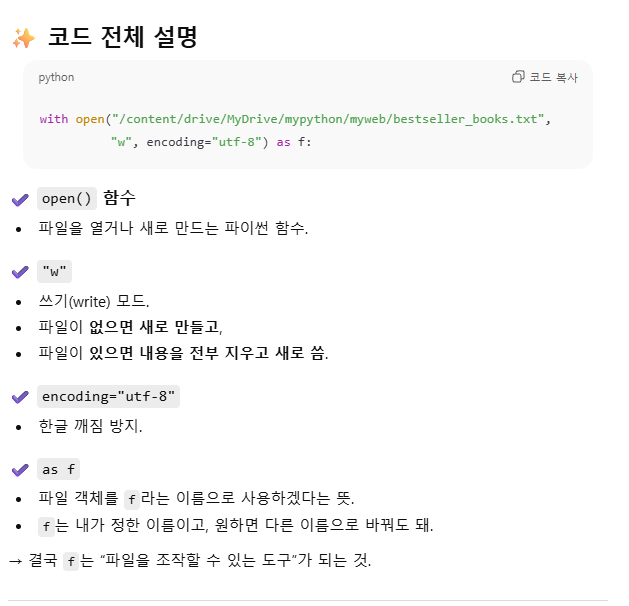

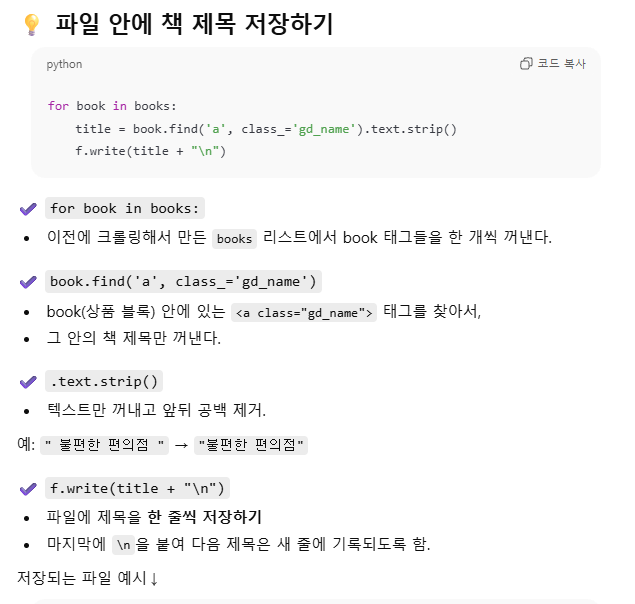

In [ ]:
# 드라이브 연동한 상태로 파일에 저장 (책 제목을 하나씩 기록) - 절대 경로사용 - Google Drive 특정 폴더에 저
with open("/content/drive/MyDrive/mypython/myweb/bestseller_books.txt", "w", encoding="utf-8") as f:
    for book in books:
        title = book.find('a', class_='gd_name').text.strip() # .strip() 사용 → 문자열 양 끝 공백/개행 제거
        f.write(title + "\n")  # 한 줄씩 저장 -  f는 파일을 가리키는 파일 객체(file object)

print("파일이 저장되었습니다: /content/drive/MyDrive/mypython/bestseller_books.txt")

# find() 함수는 조건에 맞는 첫번쨰 요소만 가져온다. 즉, html 안에서 가장 먼저 등장하는 하나의 태그를 추출한다.
# 그러므로 해당 book 안에서 첫 번째로 발견된 a태그 gd_name 클래스 하나만 변환하다.
#books는 이미 각 책 정보를 담은 개별 요소들이다. 각 book요소 내부에는 책 제목 a태그가 1개만 존재한다.
# 그러므로 find()가 적절하고 find_all()은 굳이 필요없다.

NameError: name 'books' is not defined

In [ ]:
with open("/content/drive/MyDrive/mypython/myweb/bestseller_books_1.txt", "w", encoding="utf-8") as f:

    for title in titles:
        title = title.text.strip()      # 공백 제거
        f.write(title + "\n")       # 한 줄씩 저장  #f.write 파일에 실제로 텍스트를 기록하는 명령

print("파일이 저장되었습니다: /content/drive/MyDrive/mypython/bestseller_books-1.txt")

#여기서 titles는 이전에 find_all() 함수를 통해 수집한 객체이다.
#find_all()은 html안의 조건에 맞는 모든 요소를 리스트 형태로 가져오는 것이다.
# 그러므로 결과값은 리스트이다.

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/mypython/myweb/bestseller_books_1.txt'

첫번째 코드는 HTML 태그 내부에서 a태그를 찾는 방식이고 두 번째 코드는 이미 태그 자체(title)이 a태그인 경우 사용하는 코드이다.

즉, 첫번째 코드는 books 안에 있는 요소가 전체 책 정보 블록이다. 그러므로 books 구조 안에서 a태그를 찾아야 하기 떄문에 find를 사용한 것이다

첫번째 코드는 책정보를 books로 다 가져왔기 때문에 그 중에서 책 제목을 찾기 위해 find()를 쓴 것이고,

titles는 이전에 find_all()을 통해서 애초에 책 제목이 들어있는 html 코드만 가져온 것이기 때문에 find()필요 없이 text형태로 바꾸고 공백만 제거해준 것이다.

### 2) 파일 불러와서 읽기

*   파일 읽기: 저장된 파일의 내용을 불러오려면, 파일을 읽기 모드("r")로 열고, read() 메서드를 사용하여 내용을 읽어옴

In [ ]:
with open("/content/drive/MyDrive/mypython/myweb/bestseller_books_1.txt", "r", encoding="utf-8") as f:
    content = f.read() # f는 파일을 가리키는 파일 객체(file object)

print(content)  # 전체 내용을 한 번에 출력

최소한의 삼국지
트렌드 코리아 2026
어른의 행복은 조용하다
박곰희 연금 부자 수업
혼모노
괴테는 모든 것을 말했다
위버멘쉬
절창 切創
너를 아끼며 살아라
모순
손자병법
다크 심리학
하루 한 장 나의 어휘력을 위한 필사 노트
2026 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 상
이상한 과학책
흔한남매 21 (특별한정판)
자몽살구클럽
나나 올리브에게
2026 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 하
소년이 온다
단 한 줄만 내 마음에 새긴다고 해도
흔한남매 21
흔한남매 과학 탐험대 16 힘과 운동
류수영의 평생 레시피



# 2. 다른 방식으로 Yes24 베스트셀러 페이지 크롤링해서 출력하는 파이썬 코드
1. BeautifulSoup 객체(soup)에서 find_all() 함수를 이용해서클래스(class)이름이 'itemUnit'인 모든<div> 태그들의 리스트를 books 변수에 저장하기
2. for문과 find() 라는 함수를 이용해서 books라는 <div> 리스트 안에서 각 요소에서 클래스 이름이 "gd_name"을 가진  <a>태그 코드를 찾아, 그 각 요소에서 책의 제목을 찾아  차례대로 titles 변수에 저장해서 출력하기 (.text 사용)

In [ ]:
# 파이썬으로 웹 크롤링을 수행하여 Yes24 베스트셀러 페이지에서 책 제목을 가져와서 화면에서 출력만 하는 예시

import requests
from bs4 import BeautifulSoup

# URL 변수에 크롤링할 Yes24 베스트셀러 페이지의 URL을 저장
URL ='https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24'

# 해당 웹 페이지의 HTML 데이터를 요청하여 가져
html = requests.get(URL)

 #*html.text**로 받은 HTML 코드 전체를 파싱(분석하여 필요한 부분을 추출)
soup = BeautifulSoup(html.text,'html.parser') # 'html.parser': HTML 코드를 이해할 수 있는 포맷으로 변환하는 도구

# find_all 이라는 함수를 이용해서 <div> 태그 중 클래스(class)가 'itemUnit'인 *모든 요소* 찾아, 그 <div> 리스트를 books 변수에 저장하기
books = soup.find_all('div', class_='itemUnit')
# HTML에서 div 태그 중에서 클래스가 'itemUnit'인 부분을 모두 찾아서 books 리스트에 저장. div.itemUnit 부분에는 각 책의 모든 정보가 포함

#여기 보면 그냥 class = ' '이 아니라, class_ = ''이다. 반드시 _에 주의하자

# 각 책에서 책 제목이 들어있는 a 태그(클래스 'gd_name')를 찾아 그 텍스트(책 제목)를 titles 변수에 저장하고 출력하기
for book in books:
    titles = book.find('a', class_='gd_name').text
    print(titles)

#즉, 먼저 div를 가져온 후에 태그와 클래스 이름으로 수집한다고 하면, find_all 이랑 find 둘 다 사용
#만약, 전체 중에 태그, 클래스 이름으로 가져오고 싶으면 find_all만 씀. 그 후에는 html.text.strip()만 해줌!

최소한의 삼국지
할매
박곰희 연금 부자 수업 (10만 부 기념 스페셜 에디션)
흔한남매 21
진보를 위한 주식투자
어른의 행복은 조용하다
괴테는 모든 것을 말했다
2026 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 상
혼모노
트렌드 코리아 2026
2026 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 하
위버멘쉬
절창 切創
너를 아끼며 살아라
같이, 한 컷
모순
자몽살구클럽
하루 한 장 나의 어휘력을 위한 필사 노트
최소한의 한국사
필사, 어른이 되는 시간
안녕이라 그랬어
다크 심리학
소년이 온다
된다! 하루 만에 끝내는 제미나이 활용법


# Yes24 베스트셀러 페이지 크롤링해서 **리스트로 저장**하고 출력하고 폴더에 저장하기

In [ ]:
import requests
from bs4 import BeautifulSoup

# 크롤링할 Yes24 베스트셀러 페이지의 URL을 지정
URL = 'https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24'

# 웹 페이지 요청: 지정된 URL에 HTTP GET 요청을 보내고, 응답 데이터(응답과 htmㅣ코드)를 html에 저장
html = requests.get(URL)

# HTML 코드 파싱: 받은 HTML 코드(html.text)를 분석가능한 HTML 코드로 변환해서 원하는 데이터를 탐색하고 추출
soup = BeautifulSoup(html.text, 'html.parser')

# 클래스가 'itemUnit'인 모든 <div> 태그 찾기: 그 리스트를 books 변수에 저장하기
books = soup.find_all('div', class_='itemUnit')

# 빈 리스트 생성
book_titles = []

# 각 책 제목을 리스트에 추가
for book in books: # 클래스가 'itemUnit'인 모든 <div> 태그(books)를 순회하면서 각각의 태그에 대해 ...
    title = book.find('a', class_='gd_name').text
    book_titles.append(title)

# 클래스가 'itemUnit'인 모든 <div> 태그(books)의 HTML 블록를 하나씩 순회
# 그 <a> 태그 중 클래스(class)가 'gd_name'인 조건을 만족하는 태그를 하나씩 선택
# .text를 사용해 해당 <a> 태그의 텍스트(책 제목)를 하나씩 추출
#  책제목 하나씩 title 변수에 차례차례 저장
#  그책제목을 빈 리스트은 book_titles = [] 에 하나씩 추가

# 리스트 출력
print(book_titles)


['트렌드 코리아 2026', '[예스리커버] 달리기를 말할 때 내가 하고 싶은 이야기(한정특별판)', '위버멘쉬', '대형주 추세추종 투자법칙', '절창 切創', '박곰희 연금 부자 수업', '어른의 행복은 조용하다', '단 한 줄만 내 마음에 새긴다고 해도', '탁! 깨달음의 대화', '다크 심리학', '혼모노', '호의에 대하여', '모순', '체인소 맨 21', '봇치·더·록! 8 특별판', '정승제의 수학 대모험 1', '이재명 대통령과 함께 365 일력', '풍미의 과학', '부자 아빠 투자 불변의 법칙', '렛뎀 이론', '손자병법', '하루 한 장 나의 어휘력을 위한 필사 노트', '너를 아끼며 살아라', '류수영의 평생 레시피']
